# WiDS 2021 Datathon Exploratory Analysis

This notebook just provides a quick introduction to the 2021 WiDS Datathon data.  
A subset of the training data is provided in the GitHub repo for easier access.  
Most of the contents of this notebook came from the `wids-2021-explore.ipynb` notebook on the Datathon's [Kaggle](https://www.kaggle.com/c/widsdatathon2021/notebooks) page.  
But, that notebook is no longer available and I don't have the author's name.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 0)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


df_train = pd.read_csv('data/TrainWiDS2021_subset.csv') # index_col=0)
df_test = pd.read_csv('data/TestWiDS2021.csv') # index_col=0)
df_dict = pd.read_csv('data/DataDictWiDS2021.csv')

In [2]:
print(f'Number of Records in Training: {len(df_train)}')
print("Number of Records in Test: {:,}".format(len(df_test)))

Number of Records in Training: 52063
Number of Records in Test: 10,234


In [3]:
print("df_train:", df_train.shape)
df_train.head()

df_train: (52063, 181)


encounter_id  hospital_id   age        bmi  elective_surgery  ethnicity  \
0  171209        79          NaN    23.437500  0                 Caucasian   
1  236391        173          67.0  33.179351  0                 Caucasian   
2  217771        89           69.0  19.580054  0                 Caucasian   
3  268054        86           20.0  26.480242  0                 Caucasian   
4  163243        185          54.0  26.888772  0                 Caucasian   

  gender  height hospital_admit_source      icu_admit_source  ...  \
0  F      160.0   Emergency Department  Accident & Emergency  ...   
1  M      167.6   NaN                   Accident & Emergency  ...   
2  M      182.9   Floor                 Floor                 ...   
3  M      178.0   Emergency Department  Accident & Emergency  ...   
4  F      170.1   NaN                   Accident & Emergency  ...   

   h1_pao2fio2ratio_min aids cirrhosis  hepatic_failure  immunosuppression  \
0 NaN                    0    0         0                0                   
1 NaN                    0    0         0                0                   
2 NaN                    0    0         0                0                   
3 NaN                    0    0         0                0                   
4 NaN                    0    0         0                0                   

   leukemia  lymphoma  solid_tumor_with_metastasis  diabetes_mellitus  \
0  0         0         0                            0                   
1  0         0         0                            1                   
2  0         0         0                            0                   
3  0         0         0                            0                   
4  0         0         0                            0                   

      bmi_class  
0  (15.0, 25.0]  
1  (25.0, 36.0]  
2  (15.0, 25.0]  
3  (25.0, 36.0]  
4  (25.0, 36.0]  

[5 rows x 181 columns]

In [4]:
# Target variable distribution in the training data

df_train["diabetes_mellitus"].value_counts(dropna=False)

0    40912
1    11151
Name: diabetes_mellitus, dtype: int64

# Dictionary
Note: Description of icu_stay_type, not found but the values are explanatory.

In [5]:
print("{} variables in data dictionary".format(len(df_dict)))
df_dict.head()

181 variables in data dictionary


Category     Variable Name     Unit of Measure Data Type  \
0  identifier   encounter_id      None                integer    
1  identifier   hospital_id       None                integer    
2  demographic  age               Years               numeric    
3  demographic  bmi               kilograms/metres^2  string     
4  demographic  elective_surgery  None                binary     

                                                                           Description  \
0  Unique identifier associated with a patient unit stay                                 
1  Unique identifier associated with a hospital                                          
2  The age of the patient on unit admission                                              
3  The body mass index of the person on unit admission                                   
4  Whether the patient was admitted to the hospital for an elective surgical operation   

  Example  
0  None    
1  None    
2  None    
3  21.5    
4  0

In [6]:
# Categories of the Variables
print(f'Unique Categories of the Variables: {df_dict.Category.unique()}')
print('-----')
# Unique Data Types
print(f'Unique Data Type: {df_dict["Data Type"].unique()}')

Unique Categories of the Variables: ['identifier' 'demographic' 'APACHE covariate' 'vitals' 'labs'
 'labs blood gas' 'APACHE comorbidity' 'Target Variable']
-----
Unique Data Type: ['integer' 'numeric' 'string' 'binary']


# Quick Look at Categorical Variables

Including Boolean variables, there are quite a few categorical variables: elective_surgery, ethnicity, gender, hospital_admit_source, icu_admit_source, icu_id, icu_stay_type, icu_type, ventilated_apache, aids, cirrhosis, hepatic_failure, immunosuppression, leukemia, lymphoma, and solid_tumor_with_metastasis.

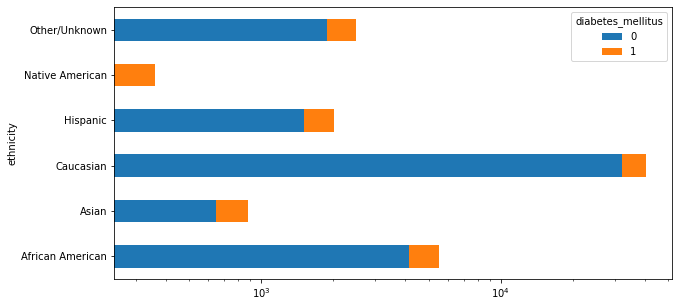

In [7]:
# visualizing the log values of ethnicity counts

df_train.pivot_table(index="ethnicity",
                     columns="diabetes_mellitus",
                     aggfunc='size').plot.barh(stacked=True, log="log", figsize=(10,5));

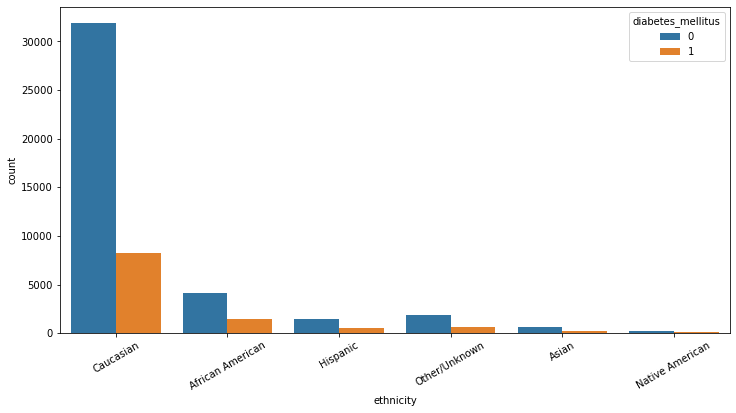

In [8]:
# untransformed ethnicity values

plt.figure(figsize=(12,6))
g = sns.countplot(x=df_train.ethnicity, hue=df_train.diabetes_mellitus, data=df_train)
g1 = g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [9]:
pd.pivot_table(df_train, values="encounter_id", index=["icu_admit_source"],
               columns=["ethnicity"], aggfunc=np.count_nonzero, fill_value=0)

ethnicity                  African American  Asian  Caucasian  Hispanic  \
icu_admit_source                                                          
Accident & Emergency       3497              522    23584      1211       
Floor                      977               138    6556       391        
Operating Room / Recovery  908               203    8601       370        
Other Hospital             113               19     1104       35         
Other ICU                  30                2      213        7          

ethnicity                  Native American  Other/Unknown  
icu_admit_source                                           
Accident & Emergency       237              1456           
Floor                      40               382            
Operating Room / Recovery  69               519            
Other Hospital             16               105            
Other ICU                  0                16

In [10]:
# ofcourse you can create categories from numeric variables, for example:
df_train["bmi_class"] = pd.cut(df_train["bmi"], 5, precision=0)
df_train["bmi_class"].head(10)

0    (15.0, 25.0]
1    (25.0, 36.0]
2    (15.0, 25.0]
3    (25.0, 36.0]
4    (25.0, 36.0]
5    (25.0, 36.0]
6    (15.0, 25.0]
7    (25.0, 36.0]
8    (25.0, 36.0]
9    (15.0, 25.0]
Name: bmi_class, dtype: category
Categories (5, interval[float64]): [(15.0, 25.0] < (25.0, 36.0] < (36.0, 47.0] < (47.0, 57.0] < (57.0, 68.0]]

In [11]:
pd.pivot_table(df_train, values="encounter_id", index=["gender", "diabetes_mellitus"],
               columns=["bmi_class"], aggfunc=np.count_nonzero, fill_value=0)

bmi_class                 (15.0, 25.0]  (25.0, 36.0]  (36.0, 47.0]  \
gender diabetes_mellitus                                             
F      0                  7453          7746          2197           
       1                  1153          2251          1043           
M      0                  8171          10917         1831           
       1                  1503          3201          951            

bmi_class                 (47.0, 57.0]  (57.0, 68.0]  
gender diabetes_mellitus                              
F      0                  478           217           
       1                  288           141           
M      0                  313           174           
       1                  180           76

# Analyzing String Columns

Note: `icu_admit_type` is listed in the WiDS Data Dictionary, but it's not found in the dataset[](http://)

In [12]:
df_dict[df_dict["Data Type"] == 'string']

Category          Variable Name     Unit of Measure Data Type  \
3   demographic       bmi                    kilograms/metres^2  string     
5   demographic       ethnicity              None                string     
6   demographic       gender                 None                string     
8   demographic       hospital_admit_source  None                string     
9   demographic       icu_admit_source       None                string     
10  demographic       icu_admit_type         None                string     
12  demographic       icu_stay_type          None                string     
13  demographic       icu_type               None                string     
18  APACHE covariate  apache_2_diagnosis     None                string     
19  APACHE covariate  apache_3j_diagnosis    None                string     

                                                                                  Description  \
3   The body mass index of the person on unit admission                                         
5   The common national or cultural tradition which the person belongs to                       
6   The genotypical sex of the patient                                                          
8   The location of the patient prior to being admitted to the hospital                         
9   The location of the patient prior to being admitted to the unit                             
10  The type of unit admission for the patient                                                  
12  NaN                                                                                         
13  A classification which indicates the type of care the unit is capable of providing          
18  The APACHE II diagnosis for the ICU admission                                               
19  The APACHE III-J sub-diagnosis code which best describes the reason for the ICU admission   

             Example  
3   21.5              
5   Caucasian         
6   F                 
8   Home              
9   Operating room    
10  Cardiothoracic    
12  None              
13  Neurological ICU  
18  308               
19  1405

In [13]:
# the initial columns pandas assigned a string datatype

print("Original string columns:\n\t{}".format(list(df_train.select_dtypes(include="object").columns)))

df_train.describe(exclude="number")

Original string columns:
	['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type']


ethnicity gender hospital_admit_source      icu_admit_source  \
count   51409      52035  38824                 51967                  
unique  6          2      15                    5                      
top     Caucasian  M      Emergency Department  Accident & Emergency   
freq    40124      28280  20616                 30904                  

       icu_stay_type      icu_type     bmi_class  
count   52063         52063         50299         
unique  3             8             5             
top     admit         Med-Surg ICU  (25.0, 36.0]  
freq    49902         28686         24125

In [14]:
# to look for particular values in a string variable, an example:

df_train_no_na = df_train.dropna(subset=["hospital_admit_source"])
df_train_no_na[df_train_no_na["hospital_admit_source"].str.contains("Emergency")].head(20)

encounter_id  hospital_id   age        bmi  elective_surgery  \
0   171209        79          NaN    23.437500  0                  
3   268054        86           20.0  26.480242  0                  
5   246374        196          50.0  26.553778  0                  
8   259920        188          28.0  26.984923  0                  
15  210566        196          32.0  33.298060  0                  
16  252979        112          70.0  28.066424  0                  
19  273501        202          70.0  31.367188  0                  
20  220872        174          73.0  30.443770  0                  
22  209559        187         NaN    22.704332  0                  
28  229441        39           53.0  30.320277  0                  
29  171594        47           53.0  28.340407  0                  
30  200543        118          68.0  23.885384  0                  
33  204506        161          52.0  41.477335  0                  
35  212091        161          67.0  20.423716  0                  
36  234124        30          NaN    24.764002  0                  
37  221782        19           54.0  47.421476  0                  
38  216811        70          NaN    27.525536  0                  
42  254166        192          80.0  28.058219  0                  
43  193069        194          28.0  43.305785  0                  
47  259772        153          85.0  31.931743  0                  

           ethnicity gender  height hospital_admit_source  \
0   Caucasian         F      160.0   Emergency Department   
3   Caucasian         M      178.0   Emergency Department   
5   Caucasian         M      175.3   Emergency Department   
8   Caucasian         M      167.6   Emergency Department   
15  African American  F      157.5   Emergency Department   
16  Caucasian         F      173.0   Emergency Department   
19  Caucasian         F      160.0   Emergency Department   
20  Caucasian         M      193.0   Emergency Department   
22  Caucasian         M      170.2   Emergency Department   
28  Caucasian         M      193.0   Emergency Department   
29  Caucasian         F      154.9   Emergency Department   
30  Caucasian         M      175.3   Emergency Department   
33  Caucasian         M      182.8   Emergency Department   
35  Caucasian         F      162.0   Emergency Department   
36  Caucasian         M      175.3   Emergency Department   
37  Caucasian         M      185.0   Emergency Department   
38  Caucasian         F      148.5   Emergency Department   
42  Caucasian         M      177.8   Emergency Department   
43  African American  F      165.0   Emergency Department   
47  Caucasian         F      170.2   Emergency Department   

        icu_admit_source  ...  h1_pao2fio2ratio_min aids cirrhosis  \
0   Accident & Emergency  ... NaN                    0    0          
3   Accident & Emergency  ... NaN                    0    0          
5   Accident & Emergency  ... NaN                    0    0          
8   Accident & Emergency  ... NaN                    0    0          
15  Accident & Emergency  ... NaN                    0    0          
16  Accident & Emergency  ... NaN                    0    0          
19  Accident & Emergency  ... NaN                    0    0          
20  Accident & Emergency  ... NaN                    0    0          
22  Accident & Emergency  ... NaN                    0    0          
28  Accident & Emergency  ... NaN                    0    0          
29  Accident & Emergency  ... NaN                    0    0          
30  Accident & Emergency  ... NaN                    0    0          
33  Accident & Emergency  ... NaN                    0    0          
35  Accident & Emergency  ... NaN                    0    0          
36  Accident & Emergency  ... NaN                    0    0          
37  Accident & Emergency  ... NaN                    0    0          
38  Accident & Emergency  ... NaN                    0    0          
42  Accident & Emergency  ... NaN

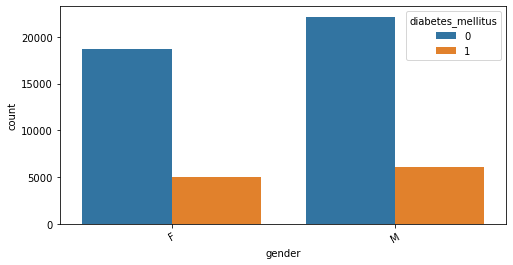

In [15]:
# Gender
plt.figure(figsize=(8,4));
g = sns.countplot(x=df_train.gender, hue=df_train.diabetes_mellitus, data=df_train)
g1 = g.set_xticklabels(g.get_xticklabels(), rotation=30)

null values in hospital_admit_source 13239


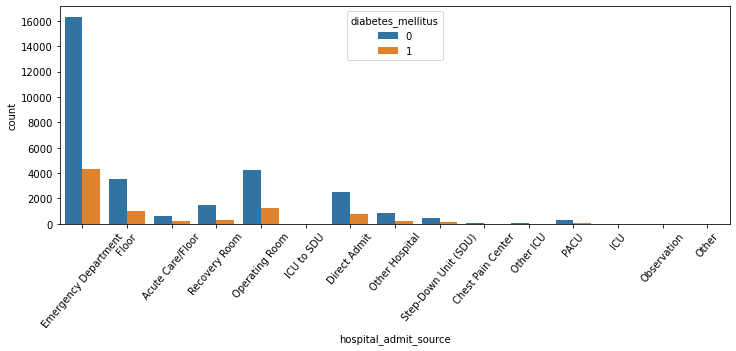

In [16]:
# hospital_admit_source
plt.figure(figsize=(12,4));
g = sns.countplot(x=df_train.hospital_admit_source, hue=df_train.diabetes_mellitus, data=df_train)
g1 = g.set_xticklabels(g.get_xticklabels(), rotation=50)
print(f'null values in hospital_admit_source {len(df_train[df_train.hospital_admit_source.isna()])}')

null values in icu_admit_source 96


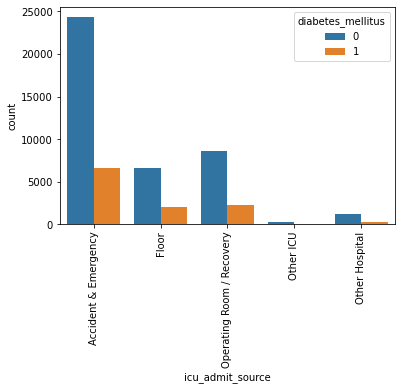

In [17]:
# icu_admit_source
g = sns.countplot(x=df_train.icu_admit_source, hue=df_train.diabetes_mellitus, data=df_train)
g1 = g.set_xticklabels(g.get_xticklabels(), rotation=90)
print(f'null values in icu_admit_source {len(df_train[df_train.icu_admit_source.isna()])}')

null values in icu_stay_type 0


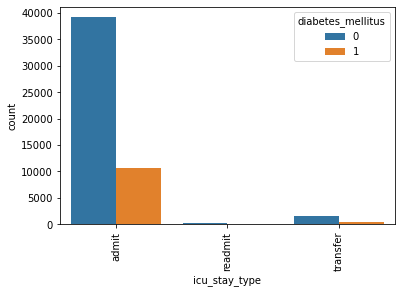

In [18]:
# icu_admit_type
g = sns.countplot(x=df_train.icu_stay_type, hue=df_train.diabetes_mellitus, data=df_train)
g1 = g.set_xticklabels(g.get_xticklabels(), rotation=90)
print(f'null values in icu_stay_type {len(df_train[df_train.icu_stay_type.isna()])}')

null values in icu_type 0


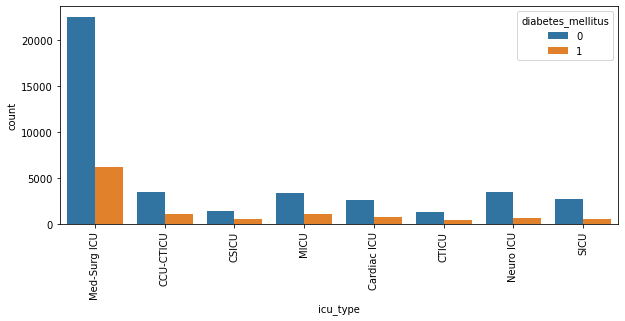

In [19]:
# icu_type
plt.figure(figsize=(10,4));
g = sns.countplot(x=df_train.icu_type, hue=df_train.diabetes_mellitus, data=df_train)
g1 = g.set_xticklabels(g.get_xticklabels(), rotation=90)
print(f'null values in icu_type {len(df_train[df_train.icu_type.isna()])}')

null values in apache_2_diagnosis 668
Unique Values in apache_2_diagnosis 44


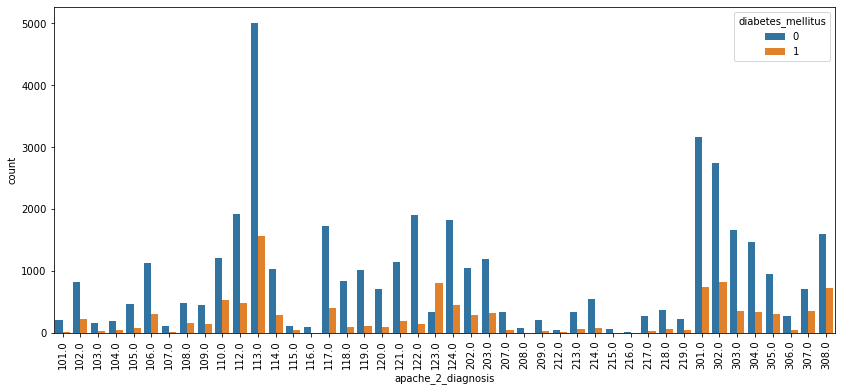

In [20]:
# apache_2_diagnosis 
plt.figure(figsize=(14,6))
g = sns.countplot(x=df_train.apache_2_diagnosis, hue=df_train.diabetes_mellitus, data=df_train)
g1 = g.set_xticklabels(g.get_xticklabels(), rotation=90)
print(f'null values in apache_2_diagnosis {len(df_train[df_train.apache_2_diagnosis.isna()])}')
print(f'Unique Values in apache_2_diagnosis {df_train.apache_2_diagnosis.nunique()}')

null values in apache_3j_diagnosis 349
Unique Values in apache_3j_diagnosis 389


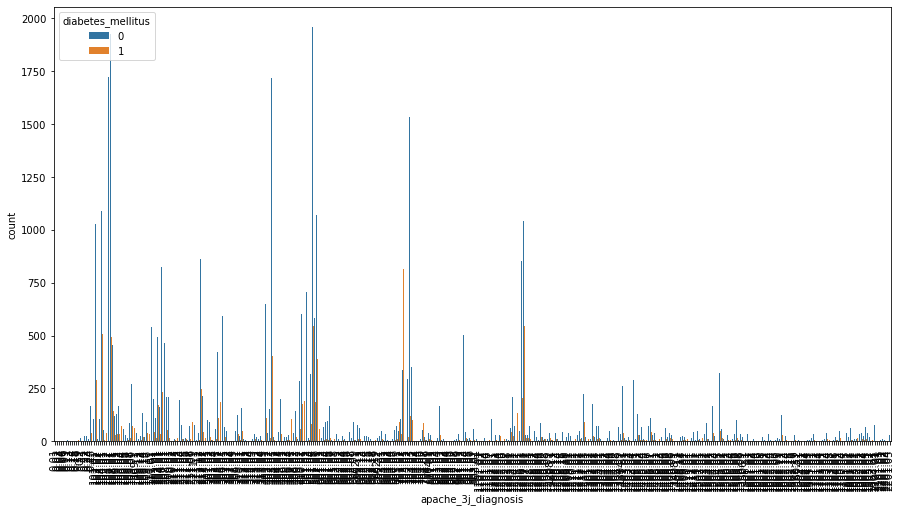

In [21]:
# apache_3j_diagnosis -- 
plt.figure(figsize=(15,8))
g = sns.countplot(x=df_train.apache_3j_diagnosis, hue=df_train.diabetes_mellitus, data=df_train)
g1 = g.set_xticklabels(g.get_xticklabels(), rotation=90)
print(f'null values in apache_3j_diagnosis {len(df_train[df_train.apache_3j_diagnosis.isna()])}')
print(f'Unique Values in apache_3j_diagnosis {df_train.apache_3j_diagnosis.nunique()}')

# How Many Missing Values?

In [22]:
# consider how many missing values there are in each column

col_na = round(100*(df_train.isna().sum()/len(df_train)), 2)
col_nunique = df_train.nunique()    
display(pd.DataFrame({"data_type": df_train.dtypes,
                      "percent_missing_values": col_na,
                      "total_unique_values": col_nunique}).sort_values(by=["percent_missing_values"],
                                                                ascending=False).head(20))

data_type  percent_missing_values  total_unique_values
h1_bilirubin_min      float64   92.09                   208                
h1_bilirubin_max      float64   92.09                   208                
h1_albumin_min        float64   91.41                   37                 
h1_albumin_max        float64   91.41                   37                 
h1_lactate_max        float64   91.01                   402                
h1_lactate_min        float64   91.01                   392                
h1_pao2fio2ratio_min  float64   87.13                   2026               
h1_pao2fio2ratio_max  float64   87.13                   2017               
h1_arterial_ph_min    float64   82.94                   524                
h1_arterial_ph_max    float64   82.94                   512                
h1_arterial_pco2_min  float64   82.86                   671                
h1_arterial_pco2_max  float64   82.86                   683                
h1_arterial_po2_min   float64   82.69                   1222               
h1_arterial_po2_max   float64   82.69                   1228               
h1_hco3_max           float64   81.85                   172                
h1_hco3_min           float64   81.85                   160                
h1_wbc_min            float64   81.67                   1392               
h1_wbc_max            float64   81.67                   1390               
h1_calcium_max        float64   81.58                   59                 
h1_calcium_min        float64   81.58                   62

# Correlations Between Variables

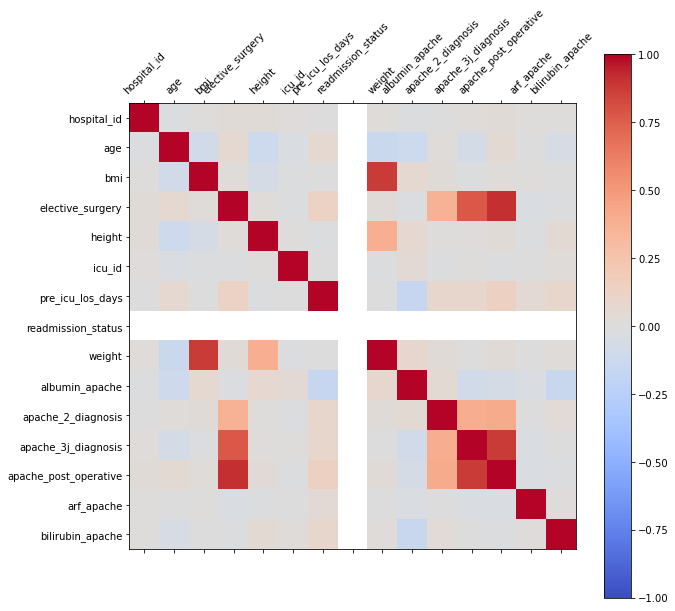

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# correlation between numeric variables
numeric_columns = list(df_train.select_dtypes(include=np.number).columns)
numeric_columns.remove("encounter_id")
numeric_columns = numeric_columns[0:15]
# print(numeric_columns)

df_corr = df_train[numeric_columns].corr()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(df_corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(numeric_columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(numeric_columns, rotation=45) # horizontalalignment='center')
ax.set_yticklabels(numeric_columns)
plt.show();

In [24]:
drop_list = list(df_train.select_dtypes(include="object").columns)
for i in ["encounter_id", "readmission_status", "h1_bilirubin_max", "h1_bilirubin_min"]:
    drop_list.append(i)
print(drop_list)

df_ = df_train.drop(columns=drop_list, axis=1, inplace=False)
df_ = df_.corr(method="pearson")  # [df_.corr() > .1] #.dropna(axis=0, thresh=160)
df_.style.format("{:.2}").background_gradient(cmap=plt.get_cmap("coolwarm"), axis=1)


['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'encounter_id', 'readmission_status', 'h1_bilirubin_max', 'h1_bilirubin_min']


# Combining Test and Training Data to Make Consistent Changes

Convert bmi to float

In [25]:
# Combine both Test and train for consitent transformations
# train end start 130156, Test Starts: 130157
all_data = pd.concat((df_train.loc[:,'encounter_id':'solid_tumor_with_metastasis'],
                      df_test.loc[:,'encounter_id':'solid_tumor_with_metastasis']))

In [26]:
# Convert Bmi to float
all_data['bmi'] = all_data['bmi'].astype(float)

In [27]:
all_data.bmi.dtype

dtype('float64')